![BTS](https://github.com/vfp1/bts-dsf-2020/blob/main/Logo-BTS.jpg?raw=1)

# Assignement Week 3 and 4

### Victor F. Pajuelo Madrigal <victor.pajuelo@bts.tech> - Data Science Foundations (2020-10-29)

Open this notebook in Google Colaboratory: [![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/vfp1/bts-dsf-2020/blob/main/exercises/Session_3_4_EXERCISES.ipynb)


# PANDAS

In [7]:
%config IPCompleter.greedy=True
%load_ext memory_profiler
%matplotlib inline
%run Session_3_4_EXERCISES_Helper.ipynb
%run Session_3_4_EXERCISES_Plot.ipynb
import numpy as np
import pandas as pd
import gdown
import datetime as dt
import sqlite3
import geopandas as gpd
import kaggle

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


## Groupby exersises

Import this [dataset](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user)

*   What is the mean age per occupation?
*   What is the male ratio per occupation, sort it from the most to the least. Do the same for women
*   For each occupation, calculate the minimum and maximum ages
* For each combination of occupation and gender, calculate the mean age
* For each occupation present the percentage of women and men



In [1]:
!wget https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user

--2020-11-02 13:19:41--  https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.128.133, 151.101.64.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 22667 (22K) [text/plain]
Saving to: ‘u.user’

u.user              100%[===================>]  22.14K  --.-KB/s    in 0.02s   

2020-11-02 13:19:41 (1.37 MB/s) - ‘u.user’ saved [22667/22667]



In [4]:
df_user = pd.read_csv('u.user', index_col='user_id', delimiter='|')

In [5]:
df_user.head(3)

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067


In [6]:
df_user.describe()

,age
count,943.000000
mean,34.051962
std,12.192740
min,7.000000
25%,25.000000
50%,31.000000
75%,43.000000
max,73.000000


<p align="left" style="font-size:16px"><b> What is the mean age per occupation? </b></p>

In [9]:
df_user_mean_age_occu = df_user.groupby(['occupation']).agg({'age': np.mean}).sort_values(by=['age'],ascending=False)
df_user_mean_age_occu = df_user_mean_age_occu.reset_index()
df_user_mean_age_occu = df_user_mean_age_occu.rename(columns={"occupation": "Occupation", "age": "AgeMean"})
df_user_mean_age_occu

,Occupation,AgeMean
0,retired,63.071429
1,doctor,43.571429
2,educator,42.010526
3,healthcare,41.562500
4,librarian,40.000000
5,administrator,38.746835
6,executive,38.718750
7,marketing,37.615385
8,lawyer,36.750000
9,engineer,36.388060


<p align="left" style="font-size:16px"><b> What is the male ratio per occupation, sort it from the most to the least. Do the same for women </b></p>

In [69]:
df_user_male = df_user[df_user['gender'] == 'M']
df_user_count_occu_male = df_user_male.groupby(['occupation']).agg({'age': np.size})
df_user_ratio_occu_male = df_user_count_occu_male.apply(lambda x: 100 * x/float(x.sum())).sort_values(by=['age'],ascending=False).reset_index()
df_user_ratio_occu_male = df_user_ratio_occu_male.rename(columns={"occupation": "Occupation", "age": "MaleRatio"})
df_user_ratio_occu_male

df_user_female = df_user[df_user['gender'] == 'F']
df_user_count_occu_female = df_user_female.groupby(['occupation']).agg({'age': np.size})
df_user_ratio_occu_female = df_user_count_occu_female.apply(lambda x: 100 * x/float(x.sum())).sort_values(by=['age'],ascending=False).reset_index()
df_user_ratio_occu_female = df_user_ratio_occu_female.rename(columns={"occupation": "Occupation", "age": "FemaleRatio"})
df_user_ratio_occu_female

df_user_ratio_occu_male_female = pd.merge(df_user_ratio_occu_male, df_user_ratio_occu_female, how='left', on=['Occupation', 'Occupation']).fillna(0)
df_user_ratio_occu_male_female


,Occupation,MaleRatio,FemaleRatio
0,student,20.298507,21.978022
1,other,10.298507,13.186813
2,educator,10.298507,9.523810
3,engineer,9.701493,0.732601
4,programmer,8.955224,2.197802
5,administrator,6.417910,13.186813
6,executive,4.328358,1.098901
7,scientist,4.179104,1.098901
8,technician,3.880597,0.366300
9,writer,3.880597,6.959707


In [54]:
#list = [136,69,69,65,60,43,29,28,26,26,22,16,16,15,13,10,9,7,5,5,1]
#ser = pd.Series(list)
#ser.apply(lambda x: type(x))

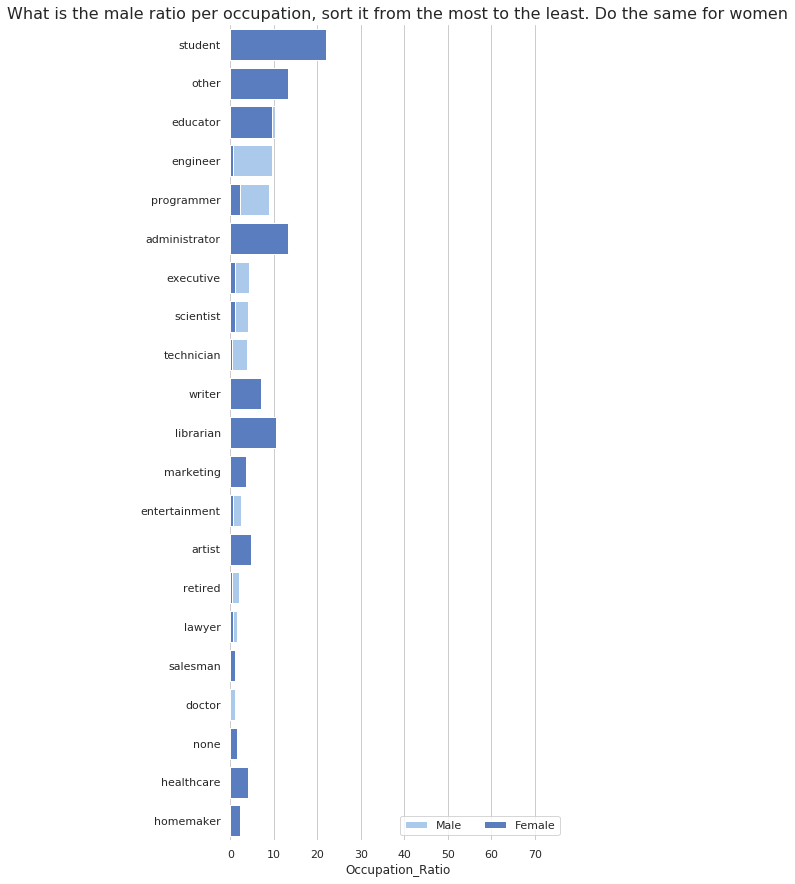

In [70]:
sns_barplot_one_var(
    df = df_user_ratio_occu_male_female,
    x1 = "MaleRatio",
    y1 = "Occupation",
    label1 = "Male",
    x2 = "FemaleRatio",
    y2 = "Occupation",
    label2 = "Female",
    ax_label = "Occupation_Ratio",
    ax_title  = "What is the male ratio per occupation, sort it from the most to the least. Do the same for women",
    p_xlim_right = max_val[0],
    plot_second_bar = True
)

<p align="left" style="font-size:16px"><b> For each occupation, calculate the minimum and maximum ages </b></p>

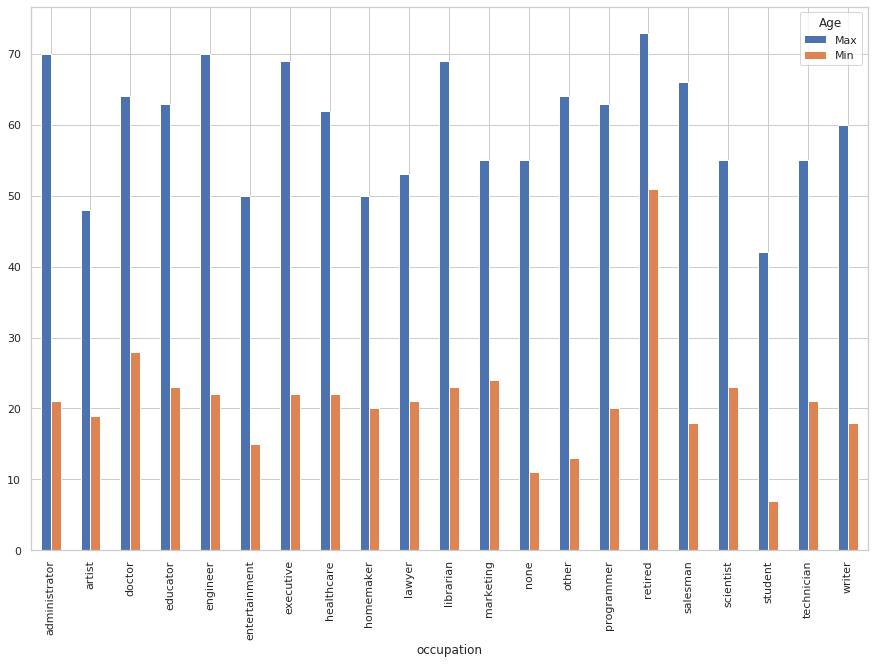

In [92]:
df_user_count_occu_max_min = df_user.groupby(['occupation']).agg({'age': [np.max, np.min]})
df_user_count_occu_max_min.plot.bar(figsize=(15,10))
plt.legend(title='Age', labels=['Max', 'Min'])
plt.show()


<p align="left" style="font-size:16px"><b> For each combination of occupation and gender, calculate the mean age </b></p>

In [33]:
df_user_mean_age_occu_male = df_user[df_user['gender'] == 'M'].groupby(['occupation']).agg({'age': np.mean}).sort_values(by=['age'],ascending=False)
df_user_mean_age_occu_male = df_user_mean_age_occu_male.reset_index()
df_user_mean_age_occu_male = df_user_mean_age_occu_male.rename(columns={"occupation": "Occupation", "age": "AgeMeanMale"})
df_user_mean_age_occu_male

df_user_mean_age_occu_female = df_user[df_user['gender'] == 'F'].groupby(['occupation']).agg({'age': np.mean}).sort_values(by=['age'],ascending=False)
df_user_mean_age_occu_female = df_user_mean_age_occu_female.reset_index()
df_user_mean_age_occu_female = df_user_mean_age_occu_female.rename(columns={"occupation": "Occupation", "age": "AgeMeanFemale"})
df_user_mean_age_occu_female

df_user_mean_age_occu_male_female = pd.merge(df_user_mean_age_occu_male, df_user_mean_age_occu_female, how='left', on=['Occupation', 'Occupation']).fillna(0)
df_user_mean_age_occu_male_female


,Occupation,AgeMeanMale,AgeMeanFemale
0,retired,62.538462,70.000000
1,healthcare,45.400000,39.818182
2,doctor,43.571429,0.000000
3,educator,43.101449,39.115385
4,librarian,40.000000,40.000000
5,salesman,38.555556,27.000000
6,executive,38.172414,44.000000
7,marketing,37.875000,37.200000
8,administrator,37.162791,40.638889
9,engineer,36.600000,29.500000


In [34]:
max_val_1 = (df_user_mean_age_occu_male_female['AgeMeanMale'].head(1) * 1.1)
max_val_2 = (df_user_mean_age_occu_male_female['AgeMeanFemale'].head(1) * 1.1)
if max_val_1[0] > max_val_2[0]:
    max_val = max_val_1
else:
    max_val = max_val_2
max_val[0]

77.0

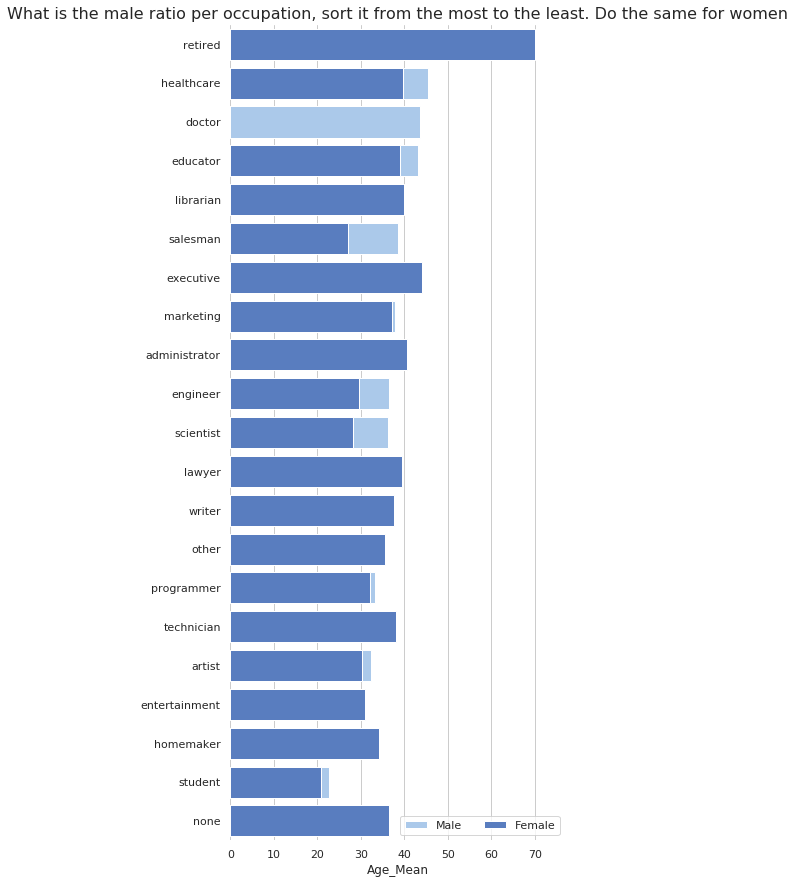

In [35]:
sns_barplot_one_var(
    df = df_user_mean_age_occu_male_female,
    x1 = "AgeMeanMale",
    y1 = "Occupation",
    label1 = "Male",
    x2 = "AgeMeanFemale",
    y2 = "Occupation",
    label2 = "Female",
    ax_label = "Age_Mean",
    ax_title  = "What is the male ratio per occupation, sort it from the most to the least. Do the same for women",
    p_xlim_right = max_val[0],
    plot_second_bar = True
)

<p align="left" style="font-size:16px"><b> For each occupation present the percentage of women and men </b></p>

In [113]:
df_user_perc_age_occu = df_user.groupby(['gender','occupation']).agg({'age': np.size}).reset_index()
#df_user_perc_age_occu = df_user_perc_age_occu.apply(lambda x: float(x.sum())).reset_index()
df_user_perc_age_occu

df_user_perc_age_occu_tot =  df_user_perc_age_occu.groupby(['occupation']).agg({'age': np.sum}).reset_index()
df_user_perc_age_occu_tot

df_user_perc_age_occu_conc = pd.merge(df_user_perc_age_occu, df_user_perc_age_occu_tot, how='inner', on=['occupation', 'occupation'])
df_user_perc_age_occu_conc = df_user_perc_age_occu_conc.rename(columns={"occupation": "Occupation", "age_x": "CountByGender", "age_y": "CountByOcc"  })
df_user_perc_age_occu_conc['CountPerc'] = df_user_perc_age_occu_conc['CountByGender']/df_user_perc_age_occu_conc['CountByOcc']
df_user_perc_age_occu_conc


,gender,Occupation,CountByGender,CountByOcc,CountPerc
0,F,administrator,36,79,0.455696
1,M,administrator,43,79,0.544304
2,F,artist,13,28,0.464286
3,M,artist,15,28,0.535714
4,F,educator,26,95,0.273684
5,M,educator,69,95,0.726316
6,F,engineer,2,67,0.029851
7,M,engineer,65,67,0.970149
8,F,entertainment,2,18,0.111111
9,M,entertainment,16,18,0.888889


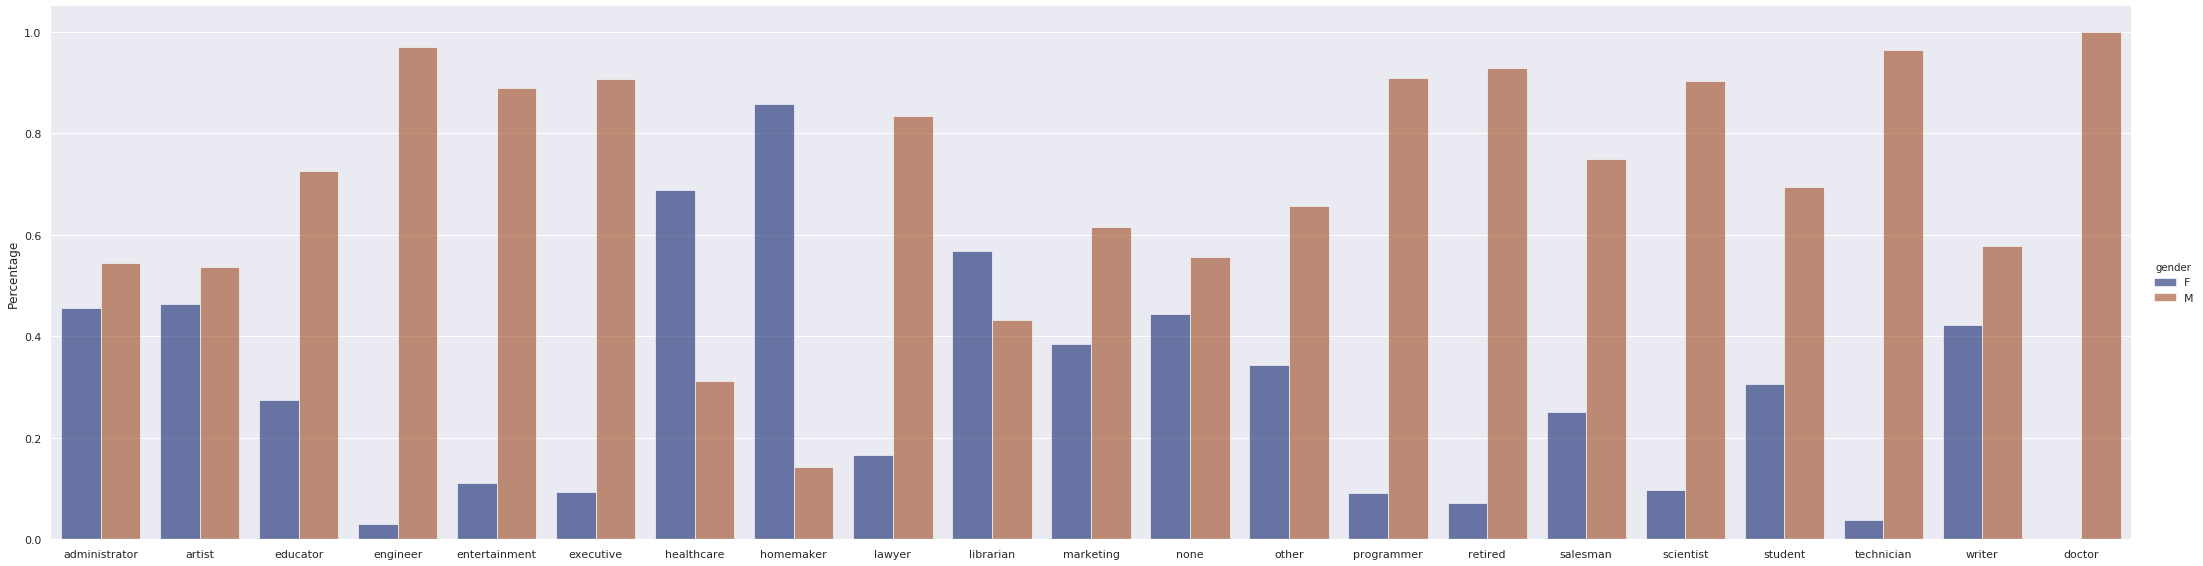

In [134]:
#f, ax = plt.subplots(figsize=(15, 5))
#sns.set(rc={'figure.figsize':(30,5)})
g = sns.catplot(
    data=df_user_perc_age_occu_conc, kind="bar",
    x="Occupation", y="CountPerc", hue="gender",
    ci="sd", palette="dark", alpha=.6, height=8.27, 
    aspect=30/8.27
)
g.despine(left=True)
g.set_axis_labels("", "Percentage")
plt.show()

## Apply exercises

Import this [dataset](https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv)

* What is the type of the columns?
* Convert the type of the column Year to datetime64
* Set the Year column as the index of the dataframe
* Delete the Total column
* Group the year by decades and sum the values (take care with population values) 
* What is the most dangerous decade to live in the US?


In [1]:
! wget https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv

--2020-11-03 13:47:28--  https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/US_Crime_Rates_1960_2014.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.192.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5052 (4.9K) [text/plain]
Saving to: ‘US_Crime_Rates_1960_2014.csv’

US_Crime_Rates_1960 100%[===================>]   4.93K  --.-KB/s    in 0s      

2020-11-03 13:47:29 (16.5 MB/s) - ‘US_Crime_Rates_1960_2014.csv’ saved [5052/5052]



<p align="left" style="font-size:16px"><b> What is the type of the columns? </b></p>

In [4]:
df_us_crime_rates = pd.read_csv('US_Crime_Rates_1960_2014.csv', index_col='Year', parse_dates=True)

In [6]:
df_us_crime_rates.head(3)

,Population,Total,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,,
1960-01-01,179323175,3384200,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,3488000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,3752200,301510,3450700,8530,17550,110860,164570,994300,2089600,366800


In [7]:
df_us_crime_rates.dtypes

Population            int64
Total                 int64
Violent               int64
Property              int64
Murder                int64
Forcible_Rape         int64
Robbery               int64
Aggravated_assault    int64
Burglary              int64
Larceny_Theft         int64
Vehicle_Theft         int64
dtype: object

In [31]:
df_us_crime_rates.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 55 entries, 1960-01-01 to 2014-01-01
Data columns (total 10 columns):
Population            55 non-null int64
Violent               55 non-null int64
Property              55 non-null int64
Murder                55 non-null int64
Forcible_Rape         55 non-null int64
Robbery               55 non-null int64
Aggravated_assault    55 non-null int64
Burglary              55 non-null int64
Larceny_Theft         55 non-null int64
Vehicle_Theft         55 non-null int64
dtypes: int64(10)
memory usage: 7.2 KB


<p align="left" style="font-size:16px"><b> Convert the type of the column Year to datetime64 </b></p>
<p align="left" style="font-size:16px"><b> Set the Year column as the index of the dataframe</b></p>

In [8]:
df_us_crime_rates.index

DatetimeIndex(['1960-01-01', '1961-01-01', '1962-01-01', '1963-01-01',
               '1964-01-01', '1965-01-01', '1966-01-01', '1967-01-01',
               '1968-01-01', '1969-01-01', '1970-01-01', '1971-01-01',
               '1972-01-01', '1973-01-01', '1974-01-01', '1975-01-01',
               '1976-01-01', '1977-01-01', '1978-01-01', '1979-01-01',
               '1980-01-01', '1981-01-01', '1982-01-01', '1983-01-01',
               '1984-01-01', '1985-01-01', '1986-01-01', '1987-01-01',
               '1988-01-01', '1989-01-01', '1990-01-01', '1991-01-01',
               '1992-01-01', '1993-01-01', '1994-01-01', '1995-01-01',
               '1996-01-01', '1997-01-01', '1998-01-01', '1999-01-01',
               '2000-01-01', '2001-01-01', '2002-01-01', '2003-01-01',
               '2004-01-01', '2005-01-01', '2006-01-01', '2007-01-01',
               '2008-01-01', '2009-01-01', '2010-01-01', '2011-01-01',
               '2012-01-01', '2013-01-01', '2014-01-01'],
              dtype

<p align="left" style="font-size:16px"><b> Delete the Total column</b></p>

In [11]:
df_us_crime_rates.drop('Total', axis=1, inplace=True)

In [12]:
df_us_crime_rates.head(3)

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960-01-01,179323175,288460,3095700,9110,17190,107840,154320,912100,1855400,328200
1961-01-01,182992000,289390,3198600,8740,17220,106670,156760,949600,1913000,336000
1962-01-01,185771000,301510,3450700,8530,17550,110860,164570,994300,2089600,366800


<p align="left" style="font-size:16px"><b> Group the year by decades and sum the values (take care with population values)</b></p>

In [21]:
#1961 % 10 => quotient(196), remainder(1) => 196 * 10 = 1960 (Decade)
quotient,remainder = divmod(1961, 10)
print(quotient)
print(remainder)

196
1


In [26]:
df_us_crime_rates.index.year

Int64Index([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
            1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
            1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
            1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
            2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014],
           dtype='int64', name='Year')

In [30]:
df_us_crime_rates_decades   = df_us_crime_rates.groupby((df_us_crime_rates.index.year//10)*10).sum()
df_us_crime_rates_decades

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960,1915053175,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,2121193298,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,2371370069,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,2612825258,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,2947969117,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,1570146307,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


In [50]:
#It is wrong sum the population column. Instead, we need to calculate the max
df_us_crime_rates_decades['Population'] = df_us_crime_rates['Population'].groupby((df_us_crime_rates.index.year//10)*10).max()
df_us_crime_rates_decades

,Population,Violent,Property,Murder,Forcible_Rape,Robbery,Aggravated_assault,Burglary,Larceny_Theft,Vehicle_Theft
Year,,,,,,,,,,
1960,201385000,4134930,45160900,106180,236720,1633510,2158520,13321100,26547700,5292100
1970,220099000,9607930,91383800,192230,554570,4159020,4702120,28486000,53157800,9739900
1980,248239000,14074328,117048900,206439,865639,5383109,7619130,33073494,72040253,11935411
1990,272690813,17527048,119053499,211664,998827,5748930,10568963,26750015,77679366,14624418
2000,307006550,13968056,100944369,163068,922499,4230366,8652124,21565176,67970291,11412834
2010,318857056,6072017,44095950,72867,421059,1749809,3764142,10125170,30401698,3569080


<p align="left" style="font-size:16px"><b> What is the most dangerous decade to live in the US?</b></p>

In [55]:
# '90s was really dangerous in the USA (only Burglary it goes out of trend to the '80s)
df_us_crime_rates_decades.idxmax(axis="index")

Population            2010
Violent               1990
Property              1990
Murder                1990
Forcible_Rape         1990
Robbery               1990
Aggravated_assault    1990
Burglary              1980
Larceny_Theft         1990
Vehicle_Theft         1990
dtype: int64

# SQLite and Pandas

## SQLite, Pandas and the world of tips

Given [this](https://github.com/vfp1/bts-dsf-2020/blob/main/data/tips.csv) CSV file. Do the following:

* Load it in Pandas
* Save the `DataFrame` as SQLite
* Reply the following questions by slicing the SQLite database with SQL queries and then using Pandas for analysis:
    * Who is most likely to receive a tip during weekday? A Female or a Male? 
        * And during weekends?
    * What is the table size that is most likely to bring a better tip?
    * Who are giving more tips, smokers or non smokers? 

<p align="left" style="font-size:16px"><b> Load it in Pandas</b></p>

In [56]:
!wget "https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/tips.csv"

--2020-11-03 16:17:15--  https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/tips.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7943 (7.8K) [text/plain]
Saving to: ‘tips.csv’

tips.csv            100%[===================>]   7.76K  --.-KB/s    in 0.001s  

2020-11-03 16:17:16 (5.36 MB/s) - ‘tips.csv’ saved [7943/7943]



In [13]:
df_tips = pd.read_csv("tips.csv",sep=',')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null object
smoker        244 non-null object
day           244 non-null object
time          244 non-null object
size          244 non-null int64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.4+ KB


<p align="left" style="font-size:16px"><b> Save the `DataFrame` as SQLite</b></p>

In [15]:
cnx = sqlite3.connect('tips.db')
df_tips.to_sql(name='tips', con=cnx, if_exists='append', index = False)

In [16]:
! ls -ltr tips.*

-rw-r--r-- 1 root root  7943 Nov  3 16:17 tips.csv
-rw-r--r-- 1 root root 32768 Nov  4 13:50 tips.db


<p align="left" style="font-size:16px"><b> Reply the following questions by slicing the SQLite database with SQL queries and then using Pandas for analysis:
Who is most likely to receive a tip during weekday? A Female or a Male? 
And during weekends?</b></p>

In [84]:
dbConn = Sqlite3Db('tips.db') 
dbConn.query('''SELECT count(1) cant, sex, CustomerGroup 
FROM (SELECT  * , CASE day 
           WHEN 'Sat' 
               THEN 'Weekend'
           WHEN 'Sun'
               THEN 'Weekend'
           ELSE 'weekday' 
       END CustomerGroup
FROM tips
) tbl_tmp
group by sex, CustomerGroup
order by cant DESC; ''')

sqlStmRes = dbConn.cursor.fetchall()
#print(type(sqlStmRes))
#print(sqlStmRes)
df_tips_day_gender = pd.DataFrame(sqlStmRes, columns =['cant','sex','CustomerGroup'])
df_tips_day_gender

,cant,sex,CustomerGroup
0,117,Male,Weekend
1,46,Female,Weekend
2,41,Female,weekday
3,40,Male,weekday


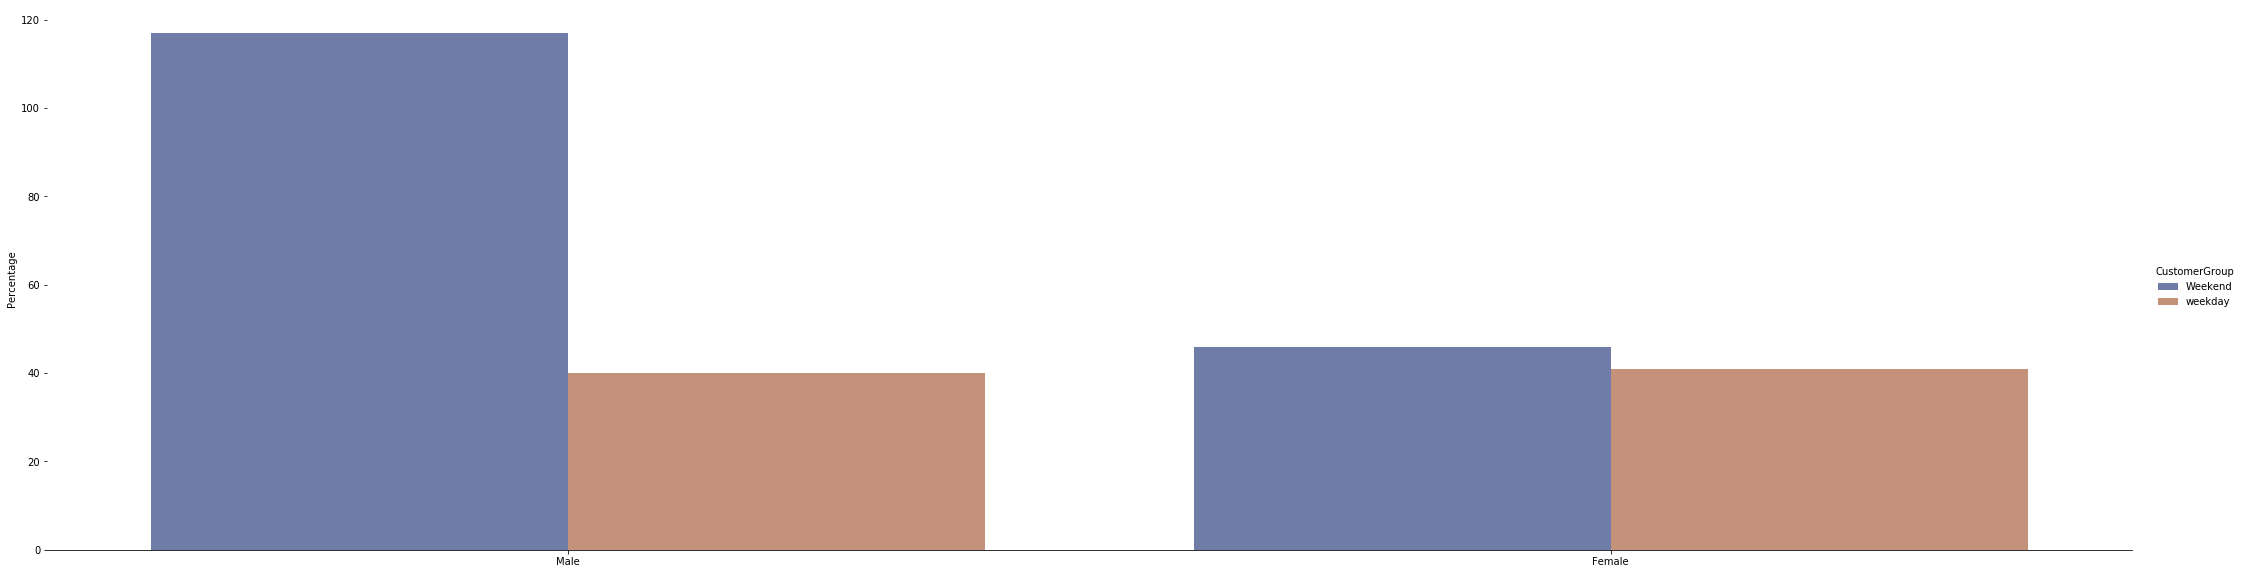

In [92]:
g = sns.catplot(
    data=df_tips_day_gender, kind="bar",
    x="sex", y="cant", hue="CustomerGroup",
    ci="sd", palette="dark", alpha=.6, height=8.27, 
    aspect=30/8.27
)
g.despine(left=True)
g.set_axis_labels("", "Percentage")
plt.show()

<p align="left" style="font-size:16px"><b> What is the table size that is most likely to bring a better tip?</b></p>

In [89]:
dbConn.query('''SELECT round(AVG(tip),5) tip_avg, size FROM tips GROUP BY size order by  tip_avg DESC; ''')

sqlStmRes = dbConn.cursor.fetchall()
df_tips_table_size = pd.DataFrame(sqlStmRes, columns =['tip_avg','size'])
df_tips_table_size



,tip_avg,size
0,5.22500,6
1,4.13541,4
2,4.02800,5
3,3.39316,3
4,2.58231,2
5,1.43750,1


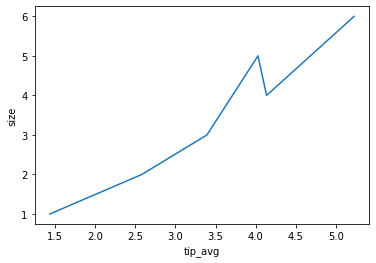

In [95]:
g = sns.lineplot(x="tip_avg", y="size",
             data=df_tips_table_size)
plt.show()

<p align="left" style="font-size:16px"><b> Who are giving more tips, smokers or non smokers? </b></p>

In [96]:
dbConn.query('''SELECT round(AVG(tip),5) tip_avg, smoker, size FROM tips GROUP BY size, smoker order by  tip_avg DESC; ''')

sqlStmRes = dbConn.cursor.fetchall()
df_tips_smokers = pd.DataFrame(sqlStmRes, columns =['tip_avg','smoker','size'])
df_tips_smokers

,tip_avg,smoker,size
0,5.22500,No,6
1,5.04667,No,5
2,4.19577,No,4
3,4.09500,Yes,3
4,3.99273,Yes,4
5,3.06923,No,3
6,2.70955,Yes,2
7,2.50000,Yes,5
8,2.48900,No,2
9,1.46000,Yes,1


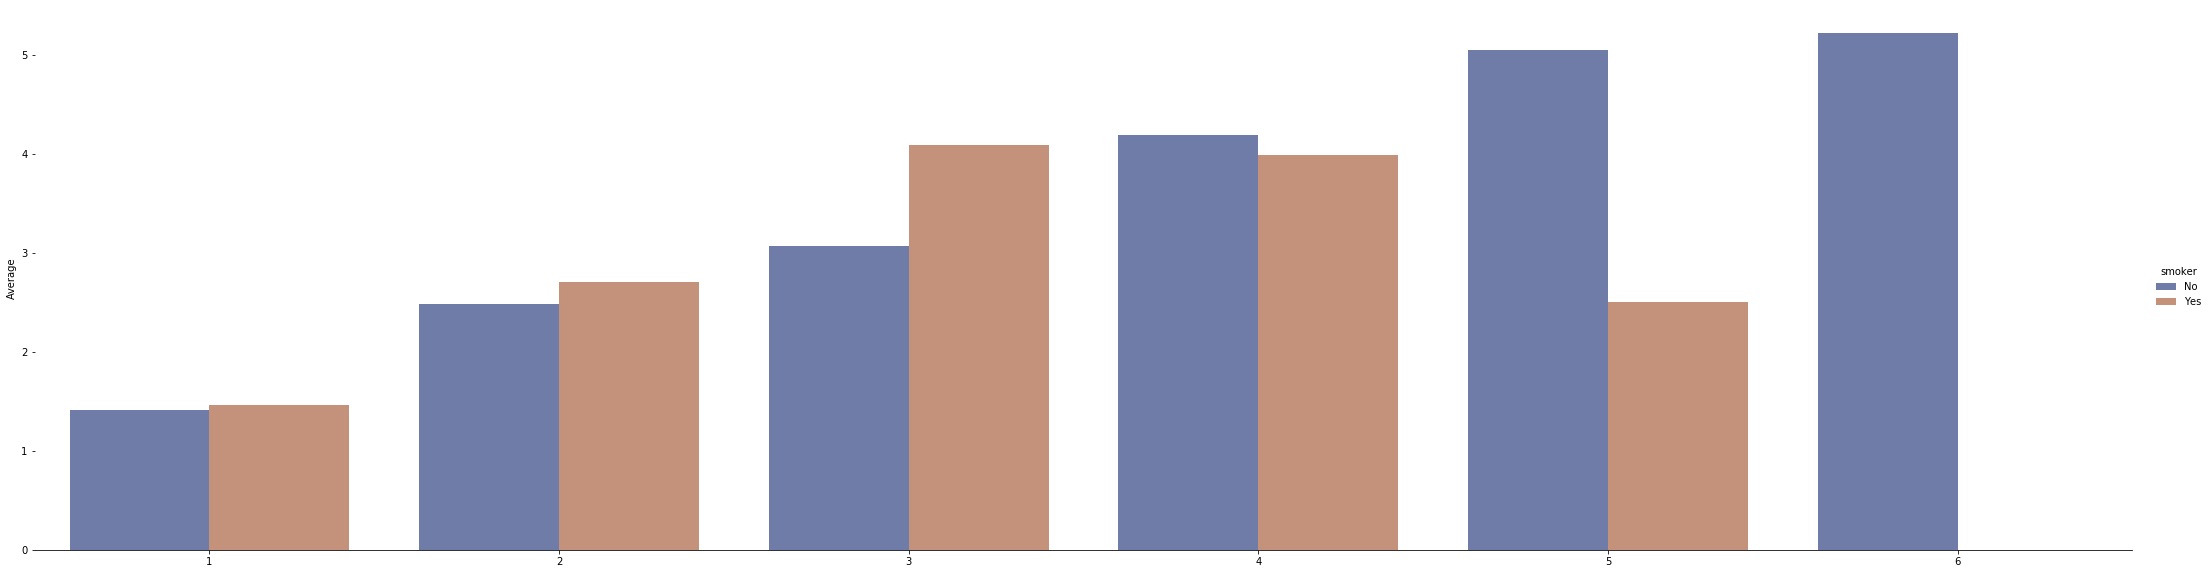

In [98]:
g = sns.catplot(
    data=df_tips_smokers, kind="bar",
    x="size", y="tip_avg", hue="smoker",
    ci="sd", palette="dark", alpha=.6, height=8.27, 
    aspect=30/8.27
)
g.despine(left=True)
g.set_axis_labels("", "Average")
plt.show()

In [ ]:
dbConn.close()

## More airports

For extra points, plot the routs of incoming/outgoing destinations using Geopandas
 

Download [this Sqlite database](https://github.com/vfp1/bts-dsf-2020/raw/main/data/flights.db)

Using SQLite database reply the following questions:

*   Which is the country that has the least amount of active airlines?
*   And which is the country that has the most amount of active airlines?
*   Which is the country that has more airports?
*   And the country with the least airports?
*   Which country has the most outgoing destinations? And the least?
*   And which country has the most incoming destinations? And the least?



<p align="left" style="font-size:16px"><b> Which is the country that has the least amount of active airlines? </b></p>

In [100]:
!wget https://github.com/vfp1/bts-dsf-2020/raw/main/data/flights.db


--2020-11-03 20:01:04--  https://github.com/vfp1/bts-dsf-2020/raw/main/data/flights.db
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/flights.db [following]
--2020-11-03 20:01:05--  https://raw.githubusercontent.com/vfp1/bts-dsf-2020/main/data/flights.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5415936 (5.2M) [application/octet-stream]
Saving to: ‘flights.db’

flights.db          100%[===================>]   5.17M  4.47MB/s    in 1.2s    

2020-11-03 20:01:07 (4.47 MB/s) - ‘flights.db’ saved [5415936/5415936]



In [2]:
dbConn = Sqlite3Db('flights.db') 
dbConn.query('''select min(tbl_tmp.cant) min_cant
from (
SELECT country, count(1) cant 
FROM airlines WHERE active = 'Y'
AND country is not NULL
GROUP BY country) tbl_tmp; ''')

sqlStmRes = dbConn.cursor.fetchall()
#print(type(sqlStmRes))
#print(sqlStmRes)
df_airlines_country_min = pd.DataFrame(sqlStmRes, columns =['min_cant'])
#df_airlines_country_cant_min.info()
min_cant = df_airlines_country_min.min_cant[0]

stm_str = '''select country, cant from 
(SELECT country, count(1) cant 
FROM airlines WHERE active = 'Y'
AND country is not NULL
GROUP BY country) tbl_tmp 
where tbl_tmp.cant = {0} order by country ASC; '''
dbConn.query(stm_str.format(min_cant))

sqlStmRes = dbConn.cursor.fetchall()
df_airlines_country_fewer = pd.DataFrame(sqlStmRes, columns =['country', 'cant'])
df_airlines_country_fewer

,country,cant
0,S.A.,1
1,ALASKA,1
2,AVIANCA,1
3,American Samoa,1
4,Antigua and Barbuda,1
5,Aruba,1
6,Bahrain,1
7,Benin,1
8,Bhutan,1
9,Botswana,1


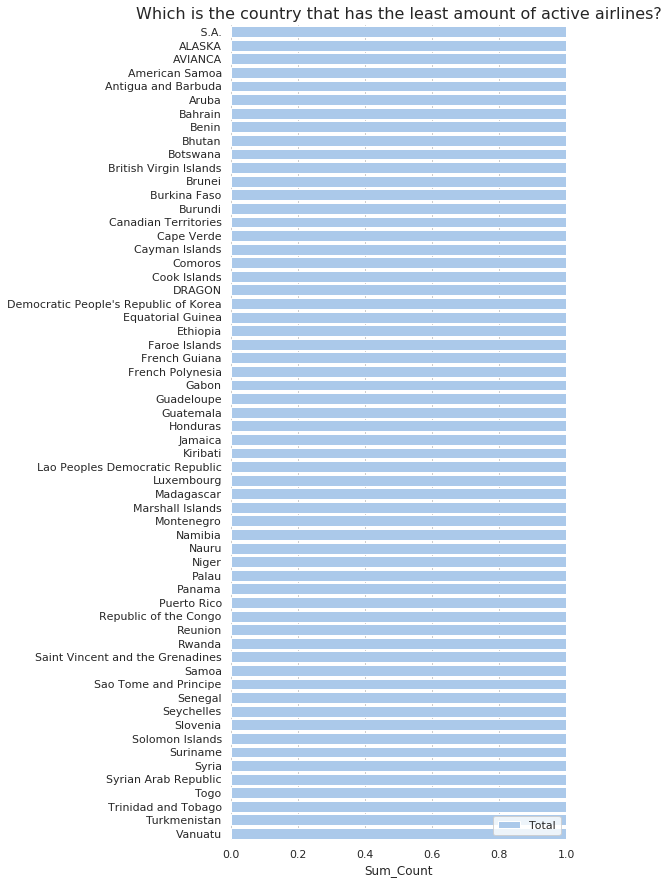

In [148]:
sns_barplot_one_var(
    df = df_airlines_country_fewer,
    x1 = "cant",
    y1 = "country",
    label1 = "Total",
    x2 = "",
    y2 = "",
    label2 = "",
    ax_label = "Sum_Count",
    ax_title  = "Which is the country that has the least amount of active airlines?",
    p_xlim_right = min_cant,
    plot_second_bar = False
)

<p align="left" style="font-size:16px"><b> And which is the country that has the most amount of active airlines?</b></p>

In [149]:
dbConn.query('''select max(tbl_tmp.cant) max_cant
from (
SELECT country, count(1) cant 
FROM airlines WHERE active = 'Y'
AND country is not NULL
GROUP BY country) tbl_tmp;''')

sqlStmRes = dbConn.cursor.fetchall()
df_airlines_country_max = pd.DataFrame(sqlStmRes, columns =['max_cant'])
#df_airlines_country_cant_min.info()
max_cant = df_airlines_country_max.max_cant[0]

dbConn.query('''select country, cant from 
(SELECT country, count(1) cant 
FROM airlines WHERE active = 'Y'
AND country is not NULL
GROUP BY country) tbl_tmp 
order by cant DESC
LIMIT 10;''')

sqlStmRes = dbConn.cursor.fetchall()
df_airlines_country_more = pd.DataFrame(sqlStmRes, columns =['country','cant'])
df_airlines_country_more

,country,cant
0,United States,141
1,Russia,72
2,United Kingdom,40
3,Germany,37
4,Canada,34
5,Australia,26
6,China,25
7,Spain,24
8,Brazil,23
9,France,22


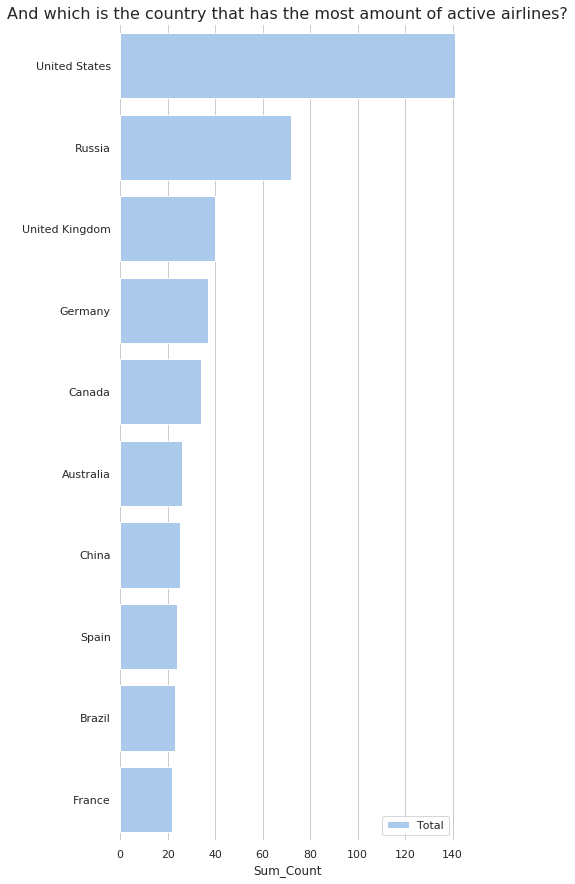

In [150]:
sns_barplot_one_var(
    df = df_airlines_country_more,
    x1 = "cant",
    y1 = "country",
    label1 = "Total",
    x2 = "",
    y2 = "",
    label2 = "",
    ax_label = "Sum_Count",
    ax_title  = "And which is the country that has the most amount of active airlines?",
    p_xlim_right = max_cant,
    plot_second_bar = False
)

<p align="left" style="font-size:16px"><b> Which is the country that has more airports?</b></p>

In [67]:
dbConn.query('''select max(tbl_tmp.cant) max_cant
from (
SELECT country, count(1) cant 
FROM airports
GROUP BY country) tbl_tmp;''')

sqlStmRes = dbConn.cursor.fetchall()
df_airports_country_max = pd.DataFrame(sqlStmRes, columns =['max_cant'])
max_cant = df_airports_country_max.max_cant[0]

dbConn.query('''select country, cant from 
(SELECT country, count(1) cant 
FROM airports
GROUP BY country) tbl_tmp 
order by cant DESC
LIMIT 10;''')

sqlStmRes = dbConn.cursor.fetchall()
df_airports_country_more = pd.DataFrame(sqlStmRes, columns =['country','cant'])
df_airports_country_more

,country,cant
0,United States,1697
1,Canada,435
2,Germany,321
3,Australia,263
4,Russia,249
5,France,233
6,China,219
7,Brazil,213
8,United Kingdom,210
9,India,140


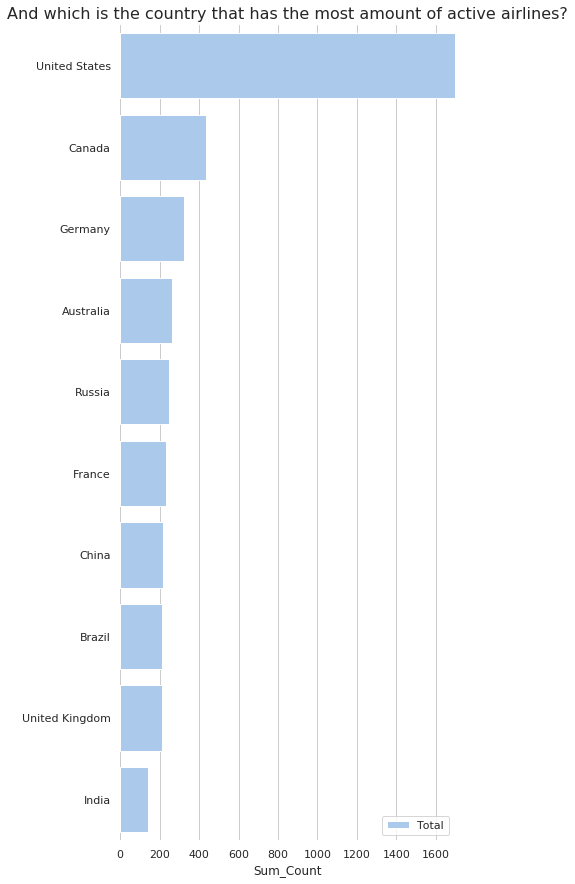

In [152]:
sns_barplot_one_var(
    df = df_airports_country_more,
    x1 = "cant",
    y1 = "country",
    label1 = "Total",
    x2 = "",
    y2 = "",
    label2 = "",
    ax_label = "Sum_Count",
    ax_title  = "And which is the country that has the most amount of active airlines?",
    p_xlim_right = max_cant,
    plot_second_bar = False
)

In [77]:
df_airports_country_more_geo = df_airports_country_more
df_airports_country_more_geo['georef'] = df_airports_country_more_geo['country'].apply(lambda x: geolocate(x))
df_airports_country_more_geo[['latitude', 'longitude']] = pd.DataFrame(df_airports_country_more_geo['georef'].tolist(), index=df_airports_country_more_geo.index)
df_airports_country_more_geo
df_airports_country_more_geo.drop(['georef'], axis=1, inplace=True)
df_airports_country_more_geo


,country,cant,latitude,longitude
0,United States,1697,39.783730,-100.445882
1,Canada,435,61.066692,-107.991707
2,Germany,321,51.083420,10.423447
3,Australia,263,-24.776109,134.755000
4,Russia,249,64.686314,97.745306
5,France,233,46.603354,1.888334
6,China,219,35.000074,104.999927
7,Brazil,213,-10.333333,-53.200000
8,United Kingdom,210,54.702354,-3.276575
9,India,140,22.351115,78.667743


In [80]:
df_airports_country_more_georeference = build_geodf(df_airports_country_more_geo)
df_airports_country_more_georeference

,country,cant,latitude,longitude,geometry
0,United States,1697,39.783730,-100.445882,POINT (-100.44588 39.78373)
1,Canada,435,61.066692,-107.991707,POINT (-107.99171 61.06669)
2,Germany,321,51.083420,10.423447,POINT (10.42345 51.08342)
3,Australia,263,-24.776109,134.755000,POINT (134.75500 -24.77611)
4,Russia,249,64.686314,97.745306,POINT (97.74531 64.68631)
5,France,233,46.603354,1.888334,POINT (1.88833 46.60335)
6,China,219,35.000074,104.999927,POINT (104.99993 35.00007)
7,Brazil,213,-10.333333,-53.200000,POINT (-53.20000 -10.33333)
8,United Kingdom,210,54.702354,-3.276575,POINT (-3.27658 54.70235)
9,India,140,22.351115,78.667743,POINT (78.66774 22.35111)


<class 'pandas.core.series.Series'>


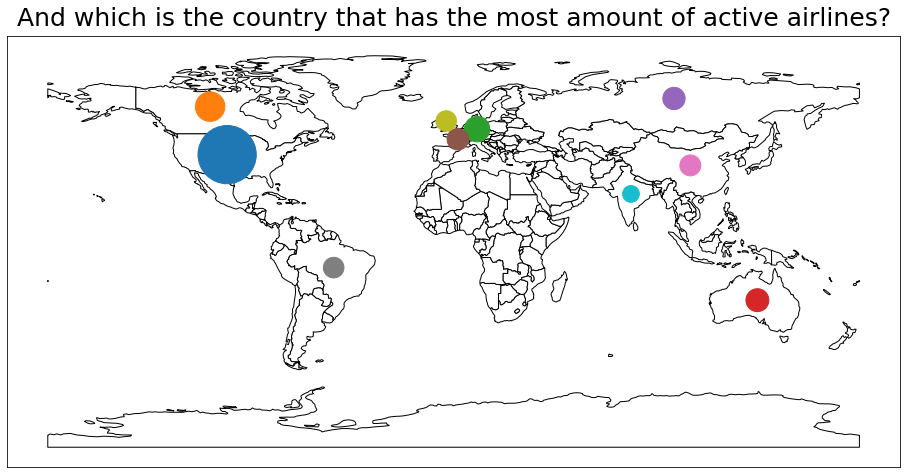

In [94]:
#Using geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(1, figsize=(16,16))

ax = world.plot(ax=ax, color='white', edgecolor='black')

markersize = df_airports_country_more_georeference['cant'] / 10 * 20
print(type(markersize))

df_airports_country_more_georeference.plot(ax=ax, color=sns.color_palette(None, max_cant), markersize=markersize)

ax.tick_params(
    axis='both', bottom=False, left=False,         
    labelbottom=False, labelleft=False) 

ax.set_title('And which is the country that has the most amount of active airlines?', fontsize=25, pad=10)

plt.show()

<p align="left" style="font-size:16px"><b> And the country with the least airports? </b></p>

In [153]:
dbConn.query('''select min(tbl_tmp.cant) min_cant
from (
SELECT country, count(1) cant 
FROM airports
GROUP BY country) tbl_tmp;''')

sqlStmRes = dbConn.cursor.fetchall()
df_airports_country_min = pd.DataFrame(sqlStmRes, columns =['min_cant'])
min_cant = df_airports_country_min.min_cant[0]

stm_str = '''select country, cant from 
(SELECT country, count(1) cant 
FROM airports
GROUP BY country) tbl_tmp 
where tbl_tmp.cant = {0} 
order by country ASC; '''
dbConn.query(stm_str.format(min_cant))

sqlStmRes = dbConn.cursor.fetchall()
df_airports_country_fewer = pd.DataFrame(sqlStmRes, columns =['country', 'cant'])
df_airports_country_fewer

,country,cant
0,Albania,1
1,Anguilla,1
2,Aruba,1
3,Barbados,1
4,Benin,1
5,Bhutan,1
6,British Indian Ocean Territory,1
7,Burundi,1
8,Christmas Island,1
9,Cocos (Keeling) Islands,1


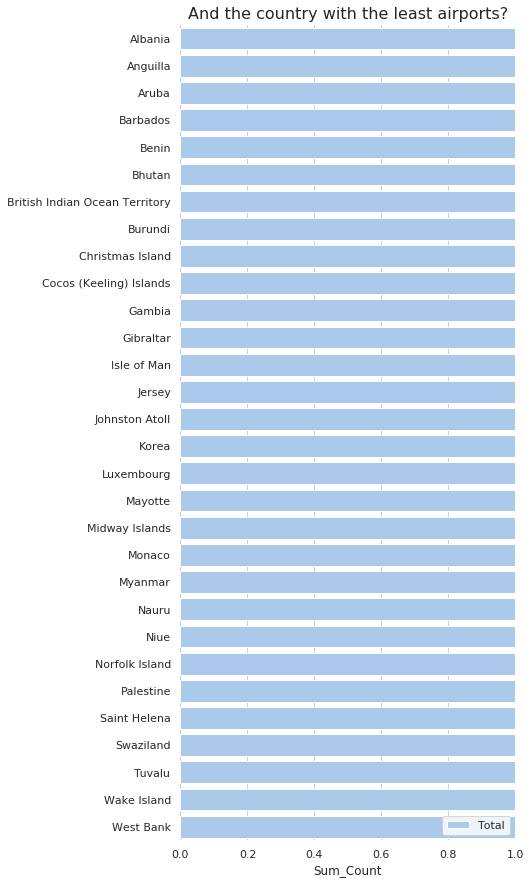

In [154]:
sns_barplot_one_var(
    df = df_airports_country_fewer,
    x1 = "cant",
    y1 = "country",
    label1 = "Total",
    x2 = "",
    y2 = "",
    label2 = "",
    ax_label = "Sum_Count",
    ax_title  = "And the country with the least airports?",
    p_xlim_right = min_cant,
    plot_second_bar = False
)

<p align="left" style="font-size:16px"><b> Which country has the most outgoing destinations? And the least? </b></p>

In [7]:
dbConn.query('''select max(tbl_tmp.cant) max_cant , country
from (
SELECT airports_ori.country, count(1) cant
FROM routes, airports as airports_ori
WHERE routes.source_id = airports_ori.id
GROUP BY airports_ori.country) tbl_tmp;''')

sqlStmRes = dbConn.cursor.fetchall()
df_country_dest_max = pd.DataFrame(sqlStmRes, columns =['max_cant', 'country'])
#df_airlines_country_cant_min.info()
max_cant = df_country_dest_max.max_cant[0]
max_country = df_country_dest_max.country[0]

dbConn.query('''SELECT airports_ori.country, count(1) cant
FROM routes, airports as airports_ori
WHERE routes.source_id = airports_ori.id
GROUP BY airports_ori.country
ORDER BY cant DESC
LIMIT 10;''')

sqlStmRes = dbConn.cursor.fetchall()
df_country_dest_more = pd.DataFrame(sqlStmRes, columns =['country','cant'])
df_country_dest_more


,country,cant
0,United States,13193
1,China,8197
2,United Kingdom,2662
3,Spain,2531
4,Germany,2353
5,Canada,1847
6,France,1846
7,Russia,1831
8,Italy,1776
9,India,1507


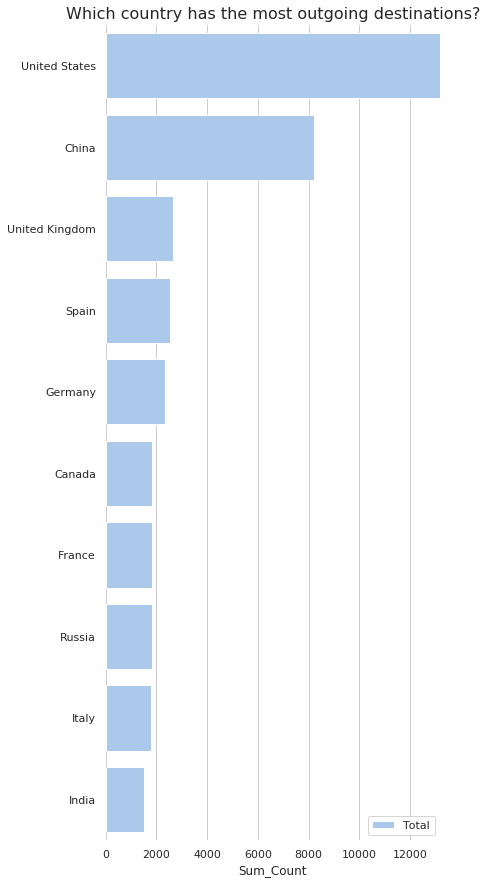

In [8]:
sns_barplot_one_var(
    df = df_country_dest_more,
    x1 = "cant",
    y1 = "country",
    label1 = "Total",
    x2 = "",
    y2 = "",
    label2 = "",
    ax_label = "Sum_Count",
    ax_title  = "Which country has the most outgoing destinations?",
    p_xlim_right = max_cant,
    plot_second_bar = False
)

In [9]:
stm_str = '''SELECT CAST(airports_ori.longitude AS float) AS source_lon, 
CAST(airports_ori.latitude AS float) AS source_lat, 
CAST(airports_des.longitude AS float) AS dest_lon, 
CAST(airports_des.latitude AS float) AS dest_lat 
FROM routes, airports as airports_ori, airports as airports_des
WHERE routes.source_id = airports_ori.id
and routes.dest_id = airports_des.id
and airports_ori.country = '{0}'; '''
dbConn.query(stm_str.format(max_country))

sqlStmRes = dbConn.cursor.fetchall()
df_country_dest_more_geo = pd.DataFrame(sqlStmRes, columns =['source_lon','source_lat','dest_lon','dest_lat'])
df_country_dest_more_geo.head(3)

,source_lon,source_lat,dest_lon,dest_lat
0,-118.841389,45.695000,-122.597500,45.588722
1,-108.459722,43.064167,-104.673178,39.861656
2,-107.894242,38.509794,-104.673178,39.861656


In [10]:
df_country_dest_more_lines = build_linestring(df_country_dest_more_geo)
df_country_dest_more_lines.head()

,source_lon,source_lat,dest_lon,dest_lat,geometry
0,-118.841389,45.695000,-122.597500,45.588722,"LINESTRING (-118.84139 45.69500, -122.59750 45..."
1,-108.459722,43.064167,-104.673178,39.861656,"LINESTRING (-108.45972 43.06417, -104.67318 39..."
2,-107.894242,38.509794,-104.673178,39.861656,"LINESTRING (-107.89424 38.50979, -104.67318 39..."
3,-152.622200,66.551900,-151.529056,66.913944,"LINESTRING (-152.62220 66.55190, -151.52906 66..."
4,-152.622200,66.551900,-147.856267,64.815114,"LINESTRING (-152.62220 66.55190, -147.85627 64..."


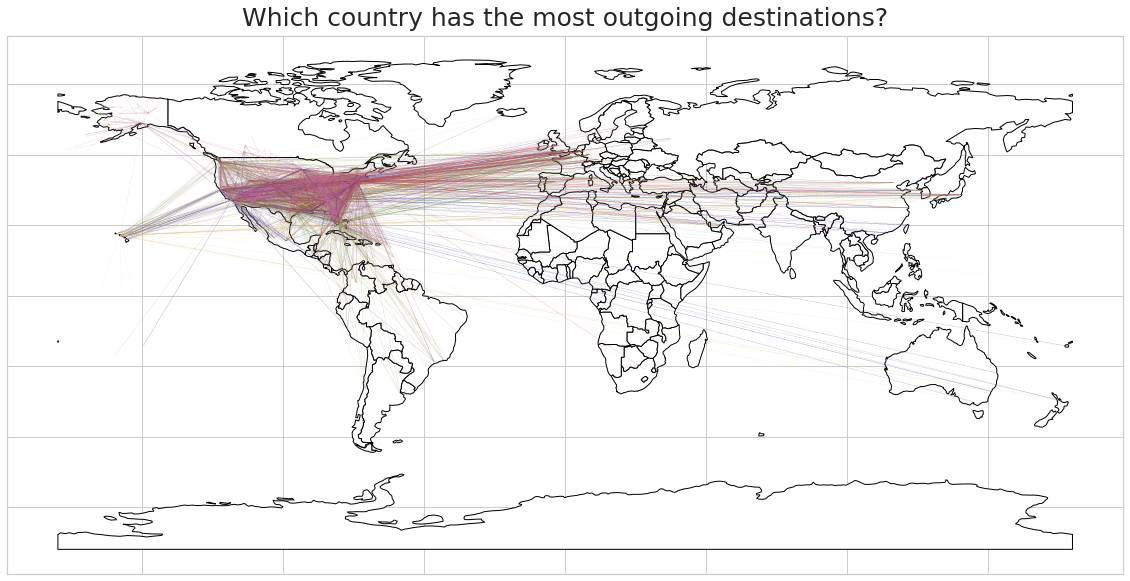

In [11]:
geoLines(df_country_dest_more_lines, 0.1, ':', 'Which country has the most outgoing destinations?')

In [12]:
dbConn.query('''select min(tbl_tmp.cant) min_cant 
from (
SELECT airports_ori.country, count(1) cant
FROM routes, airports as airports_ori
WHERE routes.source_id = airports_ori.id
GROUP BY airports_ori.country) tbl_tmp;''')

sqlStmRes = dbConn.cursor.fetchall()
df_country_dest_min = pd.DataFrame(sqlStmRes, columns =['min_cant'])
min_cant = df_country_dest_min.min_cant[0]

stm_str = '''select country, cant from 
(SELECT airports_ori.country, count(1) cant
FROM routes, airports as airports_ori
WHERE routes.source_id = airports_ori.id
GROUP BY airports_ori.country) tbl_tmp 
where tbl_tmp.cant = {0} 
order by country ASC; '''
dbConn.query(stm_str.format(min_cant))

sqlStmRes = dbConn.cursor.fetchall()
df_country_dest_fewer = pd.DataFrame(sqlStmRes, columns =['country', 'cant'])
df_country_dest_fewer

,country,cant
0,American Samoa,1
1,Cocos (Keeling) Islands,1
2,Falkland Islands,1
3,Lesotho,1
4,Monaco,1
5,Niue,1
6,Swaziland,1
7,Tuvalu,1


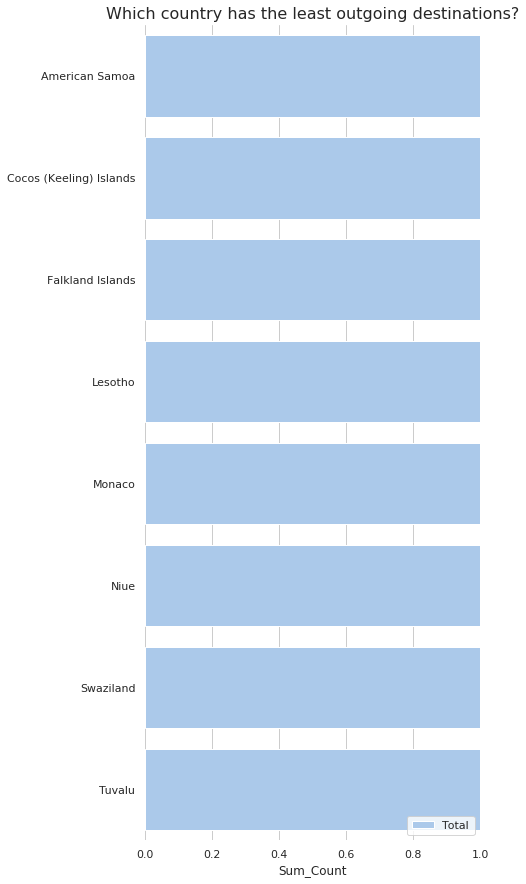

In [13]:
sns_barplot_one_var(
    df = df_country_dest_fewer,
    x1 = "cant",
    y1 = "country",
    label1 = "Total",
    x2 = "",
    y2 = "",
    label2 = "",
    ax_label = "Sum_Count",
    ax_title  = "Which country has the least outgoing destinations?",
    p_xlim_right = min_cant,
    plot_second_bar = False
)

In [14]:
stm_str = '''SELECT CAST(airports_ori.longitude AS float) AS source_lon, 
CAST(airports_ori.latitude AS float) AS source_lat, 
CAST(airports_des.longitude AS float) AS dest_lon, 
CAST(airports_des.latitude AS float) AS dest_lat 
FROM routes, airports as airports_ori, airports as airports_des
WHERE routes.source_id = airports_ori.id
and routes.dest_id = airports_des.id
and airports_ori.country in (
select country from 
(SELECT airports_ori.country, count(1) cant
FROM routes, airports as airports_ori
WHERE routes.source_id = airports_ori.id
GROUP BY airports_ori.country) tbl_tmp 
where tbl_tmp.cant = {0}
)
order by airports_des.country ASC;'''

dbConn.query(stm_str.format(min_cant))

sqlStmRes = dbConn.cursor.fetchall()

df_country_dest_fewer_geo = pd.DataFrame(sqlStmRes, columns =['source_lon','source_lat','dest_lon','dest_lat'])
df_country_dest_fewer_geo

,source_lon,source_lat,dest_lon,dest_lat
0,-58.447222,-51.822777,-70.854586,-53.002642
1,96.833900,-12.188300,105.690278,-10.450556
2,179.196389,-8.525000,178.559228,-18.043267
3,7.416667,43.733333,7.215872,43.658411
4,-169.925639,-19.080028,174.791667,-37.008056
5,31.307519,-26.529022,28.246000,-26.139166
6,27.552503,-29.462256,28.246000,-26.139166
7,-170.710500,-14.331000,-157.922428,21.318681


In [15]:
df_country_dest_fewer_lines = build_linestring(df_country_dest_fewer_geo)
df_country_dest_fewer_lines


,source_lon,source_lat,dest_lon,dest_lat,geometry
0,-58.447222,-51.822777,-70.854586,-53.002642,"LINESTRING (-58.44722 -51.82278, -70.85459 -53..."
1,96.833900,-12.188300,105.690278,-10.450556,"LINESTRING (96.83390 -12.18830, 105.69028 -10...."
2,179.196389,-8.525000,178.559228,-18.043267,"LINESTRING (179.19639 -8.52500, 178.55923 -18...."
3,7.416667,43.733333,7.215872,43.658411,"LINESTRING (7.41667 43.73333, 7.21587 43.65841)"
4,-169.925639,-19.080028,174.791667,-37.008056,"LINESTRING (-169.92564 -19.08003, 174.79167 -3..."
5,31.307519,-26.529022,28.246000,-26.139166,"LINESTRING (31.30752 -26.52902, 28.24600 -26.1..."
6,27.552503,-29.462256,28.246000,-26.139166,"LINESTRING (27.55250 -29.46226, 28.24600 -26.1..."
7,-170.710500,-14.331000,-157.922428,21.318681,"LINESTRING (-170.71050 -14.33100, -157.92243 2..."


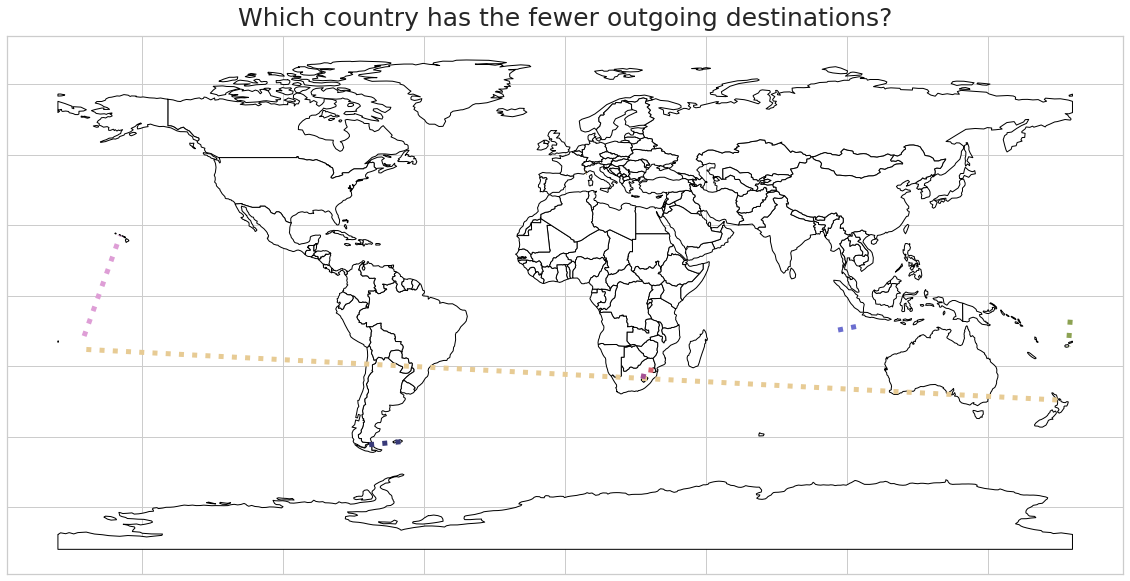

In [16]:
geoLines(df_country_dest_fewer_lines, 5, ':', 'Which country has the fewer outgoing destinations?')

<p align="left" style="font-size:16px"><b> It Ends Here! </b></p>

<p align="left" style="font-size:16px"><b> And which country has the most incoming destinations? And the least? </b></p>

In [17]:
dbConn.query('''select max(tbl_tmp.cant) max_cant , country
from (
SELECT airports_des.country, count(1) cant
FROM routes, airports as airports_des
WHERE routes.dest_id = airports_des.id
GROUP BY airports_des.country) tbl_tmp;''')

sqlStmRes = dbConn.cursor.fetchall()
df_country_ori_max = pd.DataFrame(sqlStmRes, columns =['max_cant', 'country'])
#df_airlines_country_cant_min.info()
max_cant = df_country_ori_max.max_cant[0]
max_country = df_country_ori_max.country[0]

dbConn.query('''SELECT airports_des.country, count(1) cant
FROM routes, airports as airports_des
WHERE routes.dest_id = airports_des.id
GROUP BY airports_des.country
ORDER BY cant DESC
LIMIT 10;''')

sqlStmRes = dbConn.cursor.fetchall()
df_country_ori_more = pd.DataFrame(sqlStmRes, columns =['country','cant'])
df_country_ori_more


,country,cant
0,United States,13187
1,China,8197
2,United Kingdom,2636
3,Spain,2534
4,Germany,2337
5,Canada,1856
6,France,1844
7,Russia,1835
8,Italy,1779
9,India,1504


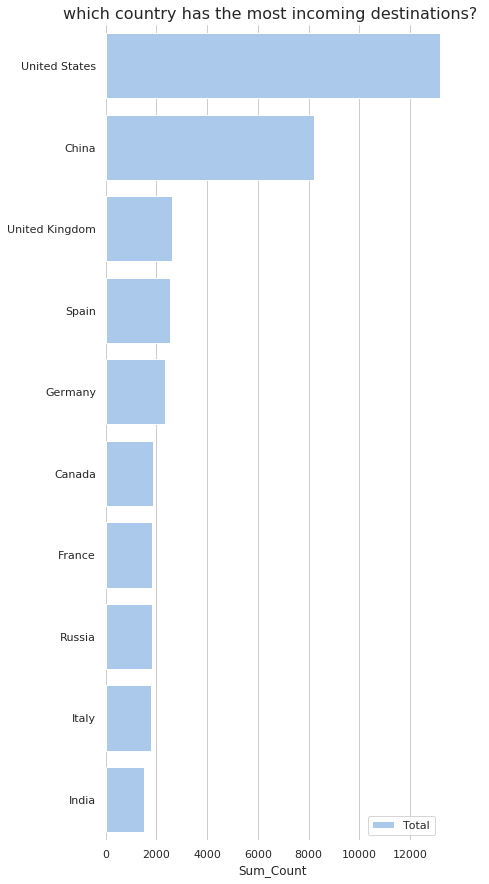

In [18]:
sns_barplot_one_var(
    df = df_country_ori_more,
    x1 = "cant",
    y1 = "country",
    label1 = "Total",
    x2 = "",
    y2 = "",
    label2 = "",
    ax_label = "Sum_Count",
    ax_title  = "which country has the most incoming destinations?",
    p_xlim_right = max_cant,
    plot_second_bar = False
)

In [19]:
stm_str = '''SELECT CAST(airports_ori.longitude AS float) AS source_lon, 
CAST(airports_ori.latitude AS float) AS source_lat, 
CAST(airports_des.longitude AS float) AS dest_lon, 
CAST(airports_des.latitude AS float) AS dest_lat 
FROM routes, airports as airports_ori, airports as airports_des
WHERE routes.source_id = airports_ori.id
and routes.dest_id = airports_des.id
and airports_des.country = '{0}'; '''
dbConn.query(stm_str.format(max_country))

sqlStmRes = dbConn.cursor.fetchall()
df_country_ori_more_geo = pd.DataFrame(sqlStmRes, columns =['source_lon','source_lat','dest_lon','dest_lat'])
df_country_ori_more_geo.head(3)

,source_lon,source_lat,dest_lon,dest_lat
0,-122.597500,45.588722,-118.841389,45.695000
1,-104.673178,39.861656,-108.459722,43.064167
2,-104.673178,39.861656,-107.894242,38.509794


In [20]:
df_country_ori_more_lines = build_linestring(df_country_ori_more_geo)
df_country_ori_more_lines.head()

,source_lon,source_lat,dest_lon,dest_lat,geometry
0,-122.597500,45.588722,-118.841389,45.695000,"LINESTRING (-122.59750 45.58872, -118.84139 45..."
1,-104.673178,39.861656,-108.459722,43.064167,"LINESTRING (-104.67318 39.86166, -108.45972 43..."
2,-104.673178,39.861656,-107.894242,38.509794,"LINESTRING (-104.67318 39.86166, -107.89424 38..."
3,-151.529056,66.913944,-152.622200,66.551900,"LINESTRING (-151.52906 66.91394, -152.62220 66..."
4,-147.856267,64.815114,-152.622200,66.551900,"LINESTRING (-147.85627 64.81511, -152.62220 66..."


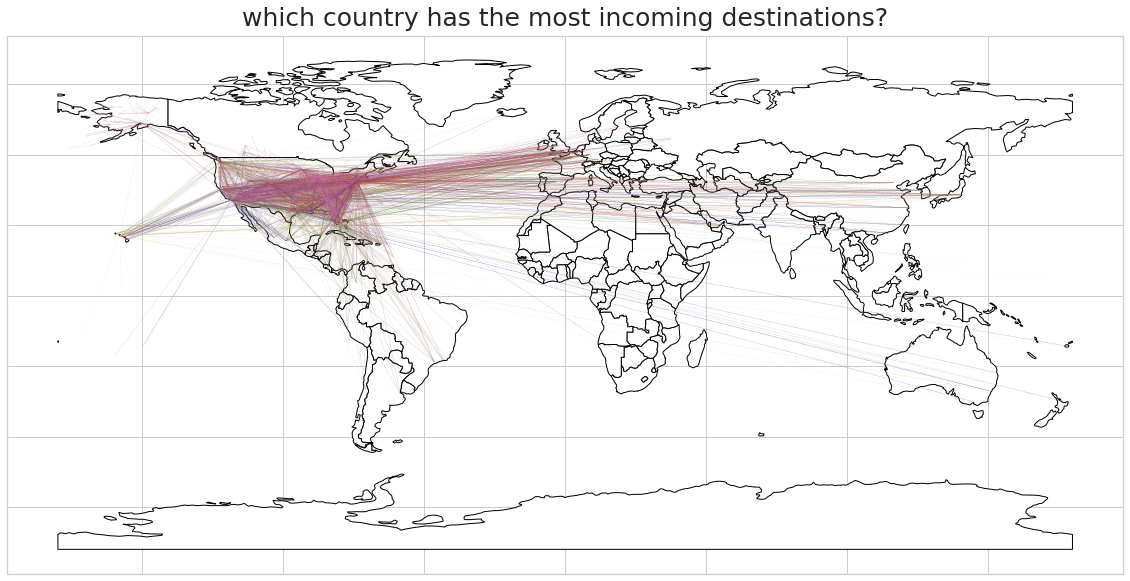

In [21]:
geoLines(df_country_ori_more_lines, 0.1, ':', 'which country has the most incoming destinations?')

In [22]:
dbConn.query('''select min(tbl_tmp.cant) min_cant 
from (
SELECT airports_des.country, count(1) cant
FROM routes, airports as airports_des
WHERE routes.dest_id = airports_des.id
GROUP BY airports_des.country) tbl_tmp;''')

sqlStmRes = dbConn.cursor.fetchall()
df_country_ori_min = pd.DataFrame(sqlStmRes, columns =['min_cant'])
min_cant = df_country_dest_min.min_cant[0]

stm_str = '''select country, cant from 
(SELECT airports_des.country, count(1) cant
FROM routes, airports as airports_des
WHERE routes.dest_id = airports_des.id
GROUP BY airports_des.country) tbl_tmp 
where tbl_tmp.cant = {0} 
order by country ASC; '''
dbConn.query(stm_str.format(min_cant))

sqlStmRes = dbConn.cursor.fetchall()
df_country_ori_fewer = pd.DataFrame(sqlStmRes, columns =['country', 'cant'])
df_country_ori_fewer

,country,cant
0,American Samoa,1
1,Cocos (Keeling) Islands,1
2,Falkland Islands,1
3,Lesotho,1
4,Monaco,1
5,Swaziland,1
6,Tuvalu,1


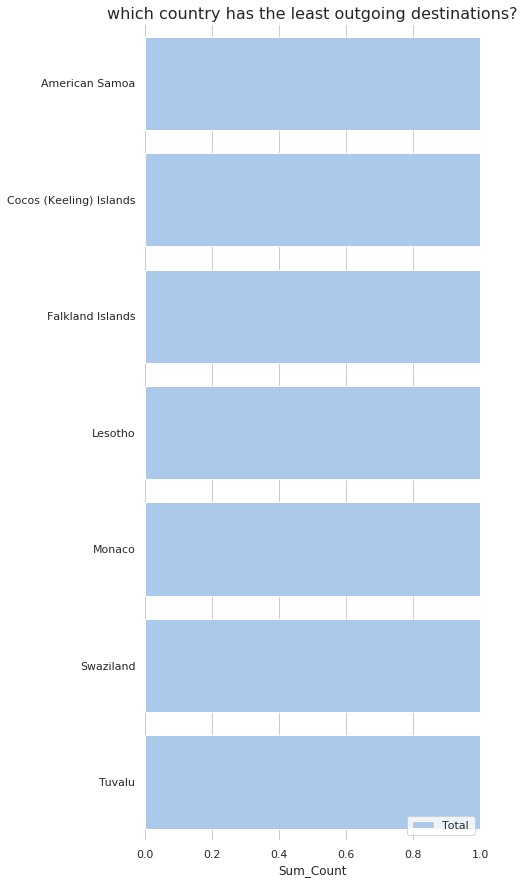

In [23]:
sns_barplot_one_var(
    df = df_country_ori_fewer,
    x1 = "cant",
    y1 = "country",
    label1 = "Total",
    x2 = "",
    y2 = "",
    label2 = "",
    ax_label = "Sum_Count",
    ax_title  = "which country has the least outgoing destinations?",
    p_xlim_right = min_cant,
    plot_second_bar = False
)

In [3]:
stm_str = '''SELECT CAST(airports_ori.longitude AS float) AS source_lon, 
CAST(airports_ori.latitude AS float) AS source_lat, 
CAST(airports_des.longitude AS float) AS dest_lon, 
CAST(airports_des.latitude AS float) AS dest_lat 
FROM routes, airports as airports_ori, airports as airports_des
WHERE routes.source_id = airports_ori.id
and routes.dest_id = airports_des.id
and airports_des.country in (
select country from 
(SELECT airports_des.country, count(1) cant
FROM routes, airports as airports_des
WHERE routes.dest_id = airports_des.id
GROUP BY airports_des.country) tbl_tmp 
where tbl_tmp.cant = {0}
)
order by airports_des.country ASC;'''

dbConn.query(stm_str.format(min_cant))

sqlStmRes = dbConn.cursor.fetchall()

df_country_ori_fewer_geo = pd.DataFrame(sqlStmRes, columns =['source_lon','source_lat','dest_lon','dest_lat'])
df_country_ori_fewer_geo

,source_lon,source_lat,dest_lon,dest_lat
0,-157.922428,21.318681,-170.710500,-14.331000
1,105.690278,-10.450556,96.833900,-12.188300
2,-69.312636,-51.608875,-58.447222,-51.822777
3,28.246000,-26.139166,27.552503,-29.462256
4,7.215872,43.658411,7.416667,43.733333
5,28.246000,-26.139166,31.307519,-26.529022
6,178.559228,-18.043267,179.196389,-8.525000


In [4]:
df_country_ori_fewer_lines = build_linestring(df_country_ori_fewer_geo)
df_country_ori_fewer_lines


,source_lon,source_lat,dest_lon,dest_lat,geometry
0,-157.922428,21.318681,-170.710500,-14.331000,"LINESTRING (-157.92243 21.31868, -170.71050 -1..."
1,105.690278,-10.450556,96.833900,-12.188300,"LINESTRING (105.69028 -10.45056, 96.83390 -12...."
2,-69.312636,-51.608875,-58.447222,-51.822777,"LINESTRING (-69.31264 -51.60887, -58.44722 -51..."
3,28.246000,-26.139166,27.552503,-29.462256,"LINESTRING (28.24600 -26.13917, 27.55250 -29.4..."
4,7.215872,43.658411,7.416667,43.733333,"LINESTRING (7.21587 43.65841, 7.41667 43.73333)"
5,28.246000,-26.139166,31.307519,-26.529022,"LINESTRING (28.24600 -26.13917, 31.30752 -26.5..."
6,178.559228,-18.043267,179.196389,-8.525000,"LINESTRING (178.55923 -18.04327, 179.19639 -8...."


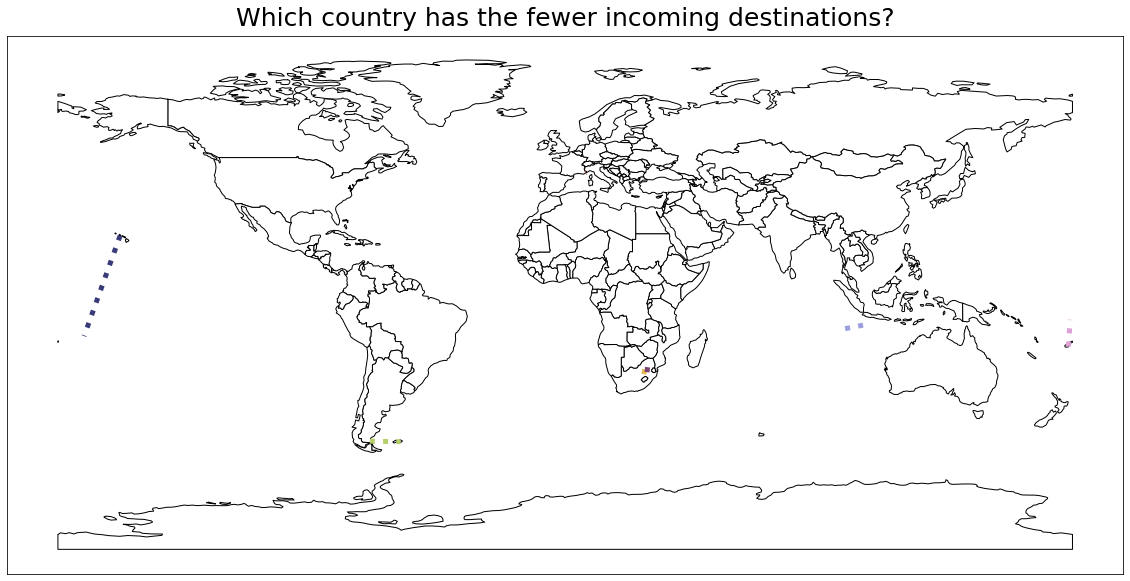

In [7]:
geoLines(df_country_ori_fewer_lines, 5, ':', 'Which country has the fewer incoming destinations?')

# Kaggle Titanic

Your first Kaggle challenge! 

Retrieve the csv (train) file from [this Kaggle challenge](https://www.kaggle.com/c/titanic/data?select=train.csv)

Either here or through a Kaggle notebook (you will need to submit then this notebook with the rest of exercises and the Kaggle notebook).

Reply to the following questions:



1.   How many men and women survived?
2.   What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years
3. Which port of embarkation had most of the survivors? And which less?
4. Which ticket class had most of the survivors? And which less?
5. Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving?



In [ ]:
#I just installed Kaggle CLI, create New API Token and download the full dataset

In [8]:
!kaggle competitions download -c titanic

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 1.84MB/s]


In [10]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [13]:
! ls -ltr train.csv

-rw-r--r-- 1 root root 61194 Dec 11  2019 train.csv


In [14]:
df_titanic = pd.read_csv("train.csv",sep=',')
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


<p align="left" style="font-size:16px"><b> How many men and women survived? </b></p>

In [20]:
df_titanic[df_titanic['Survived'] == 1].groupby(['Sex']).agg({'Age': [np.size]})

,Age
,size
Sex,
female,233.0
male,109.0


<p align="left" style="font-size:16px"><b> What was the age group that had a higher survival chance? You can divide age groups in groups of 10 years </b></p>

<p align="left" style="font-size:16px"><b> Which port of embarkation had most of the survivors? And which less? </b></p>

<p align="left" style="font-size:16px"><b> Which ticket class had most of the survivors? And which less? </b></p>

<p align="left" style="font-size:16px"><b> Could you compare the ticket fare with the survival? Did more expensive tickets had higher chance of surviving? </b></p>